In [155]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import Counter
import control

## Статистика

In [156]:
x = np.array([random.uniform(0, 9) for _ in range(100)], dtype=int)
y = np.array([random.uniform(0, 9) for _ in range(100)], dtype=int)

Функции статистики построенные с использованием библиотек

In [157]:
mean = np.mean(x)
median = np.median(x)
mode = sp.stats.mode(x)[0]
variance = np.var(x)
std = np.std(x)
covariation = np.cov(x, y, ddof=0)[0, 1]
cos_dist = sp.spatial.distance.cosine(x, y)
corr_pir = sp.stats.pearsonr(x, y)

Функции статистики реализованные в ручную

In [158]:
def mean_func(x):
    return sum(x) / len(x)

def median_func(x):
    if len(x) % 2 != 0:
        return sorted(x)[len(x) // 2]
    else:
        return (sorted(x)[len(x) // 2] + sorted(x)[len(x) // 2 - 1]) / 2

def mode_func(x):
    values, counts = np.unique(x, return_counts=True)
    return values[np.argmax(counts)]

def variance_func(x):
    mean_x = mean_func(x)
    return sum((x_i - mean_x) ** 2 for x_i in x) / len(x)

def covariation_func(x, y):
    mean_x = mean_func(x)
    mean_y = mean_func(y)
    return sum((x_i - mean_x) * (y_i - mean_y) for x_i, y_i in zip(x, y)) / len(x)

def cos_dist_func(x, y):
    return 1 - sum(x_i * y_i for x_i, y_i in zip(x, y)) / (sum(x_i * x_i for x_i in x) * sum(y_i * y_i for y_i in y)) ** 0.5

def my_corr_pearson(x, y):
    covariation_func(x, y) / (variance_func(x) * variance_func(y)) ** 0.5

In [159]:
my_mean = mean_func(x)
my_median = median_func(x)
my_mode = mode_func(x)
my_variance = variance_func(x)
my_std = my_variance ** 0.5
my_covariation = covariation_func(x, y)
my_cos_dist = cos_dist_func(x, y)
my_corr_pir = my_corr_pearson(x, y)

Вывод и сравнение результатов

In [160]:
print(f"{mean=} {my_mean=}")
print(f"{median=} {my_median=}")
print(f"{mode=} {my_mode=}")
print(f"{variance=} {my_variance=}")
print(f"{std=} {my_std=}")
print(f"{covariation=} {my_covariation=}")
print(f"{cos_dist=} {my_cos_dist=}")
print(f"{corr_pir=} {my_corr_pir=}")

mean=np.float64(3.87) my_mean=np.float64(3.87)
median=np.float64(4.0) my_median=np.float64(4.0)
mode=np.int64(1) my_mode=np.int64(1)
variance=np.float64(6.833099999999999) my_variance=np.float64(6.833099999999996)
std=np.float64(2.614019892808775) my_std=np.float64(2.6140198928087743)
covariation=np.float64(0.5335000000000001) my_covariation=np.float64(0.5335000000000002)
cos_dist=np.float64(0.29867184037747063) my_cos_dist=np.float64(0.29867184037747063)
corr_pir=PearsonRResult(statistic=np.float64(0.07341858813854346), pvalue=np.float64(0.4678780868686501)) my_corr_pir=None


## Цифровая обработка сигналов

In [161]:
fs = 200
time = np.linspace(0, 1, fs)
signal = 0.5 * np.sin(2 * np.pi * 40 * time + 2) + 0.7 * np.sin(2 * np.pi * 10 * time + 1) + 0.1 * np.sin(2 * np.pi * 25 * time + 1)
freqs = np.fft.fftfreq(signal.size, 1 / fs) # Генерация частот
rfreqs = np.fft.rfftfreq(signal.size, d=1/fs)

Преобразование Фурье

In [162]:
np_fft = np.fft.fft(signal) # Быстрое преобразование Фурье, используя алгоритм Кули-Тьюки
np_rfft = np.fft.rfft(signal) # Вещественный FFT, используетя только для real-valued данных

sp_fft = sp.fft.fft(signal) # Быстрое преобразование Фурье алгоритмом Блюштейна
sp_ifft = np.fft.ifft(sp_fft) # Обратное преобразование Фурье
sp_fftshift = np.fft.fftshift(signal) # Сдвинутый FFT для центрирование спектра

Графики

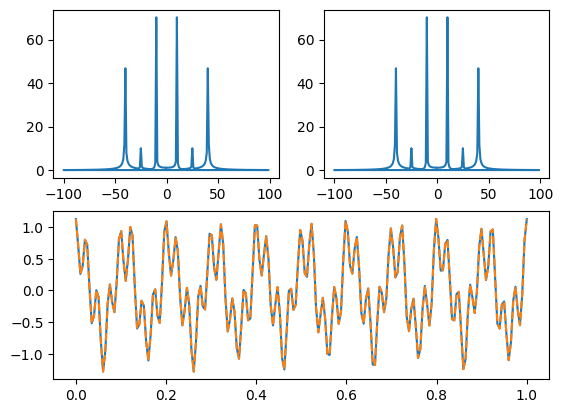

In [163]:
plt.subplot(221)
plt.plot(freqs, np.abs(np_fft))
plt.subplot(222)
plt.plot(freqs, np.abs(sp_fft))
plt.subplot(212)
plt.plot(time, sp_ifft.real)
plt.plot(time, signal, linestyle='dashed')

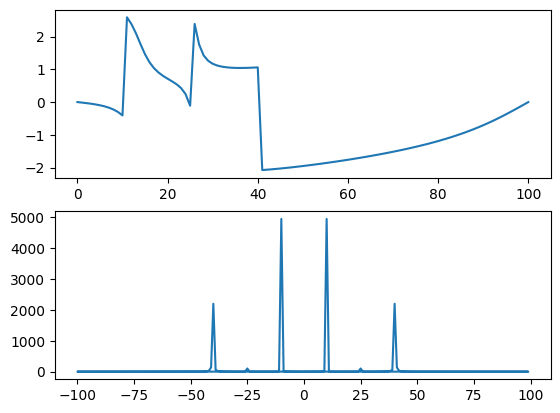

In [164]:
plt.subplot(211)
phase_filtered = np.where(np.abs(np_rfft) > 0.1 * np.angle(np_rfft), np.angle(np_rfft), np.nan)
plt.plot(rfreqs, phase_filtered)
plt.subplot(212)
plt.plot(freqs, np.abs(sp_fft) ** 2)

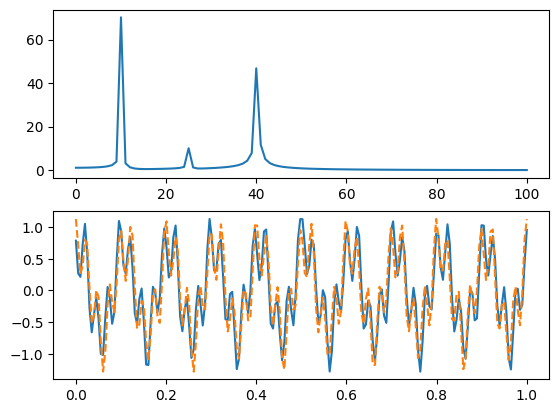

In [165]:
plt.subplot(211)
plt.plot(rfreqs, np.abs(np_rfft))
plt.subplot(212)
plt.plot(time, sp_fftshift.real)
plt.plot(time, signal, linestyle='dashed')

Преобразования Фурье реализованные вручную

In [166]:
def my_ft(time, signal):
    N = len(time)
    hand_ft = []
    for k in range(N):
        hand_ft_real = 0
        hand_ft_img = 0
        for n in range(N):
            hand_ft_real += signal[n] * np.cos(2 * np.pi * k * n / N)
            hand_ft_img -= signal[n] * np.sin(2 * np.pi * k * n / N)
        hand_ft.append(complex(hand_ft_real, hand_ft_img))
    return hand_ft

def my_ift(time, signal):
    N = len(time)
    hand_ift = []
    for k in range(N):
        hand_ift_real = 0
        hand_ift_img = 0
        for n in range(N):
            hand_ift_real += signal[n] * np.cos(2 * np.pi * k * n / N)
            hand_ift_img += signal[n] * np.sin(2 * np.pi * k * n / N)
        hand_ift.append(complex(hand_ift_real / N, hand_ift_img / N))
    return hand_ift

Построение графиков

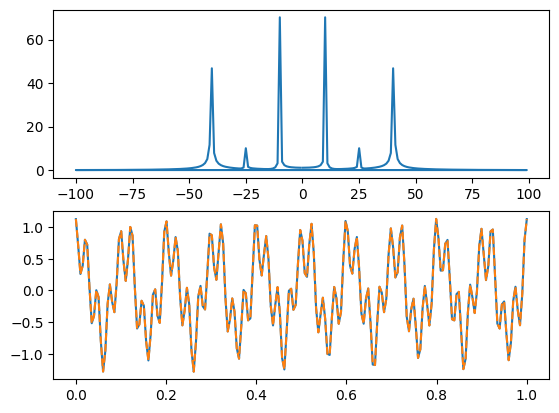

In [167]:
plt.subplot(211)
hand_ft = my_ft(time, signal)
plt.plot(freqs, np.abs(hand_ft))
plt.subplot(212)
hand_ift = my_ift(time, hand_ft)
plt.plot(time, np.real(hand_ift))
plt.plot(time, signal, linestyle='dashed')

Задание зашумленного сигнала

In [168]:
signal_with_noise = np.sin(2 * np.pi * 5 * time) + 0.5 * np.random.randn(len(time))

Построение графика с зашумлённым сигналом

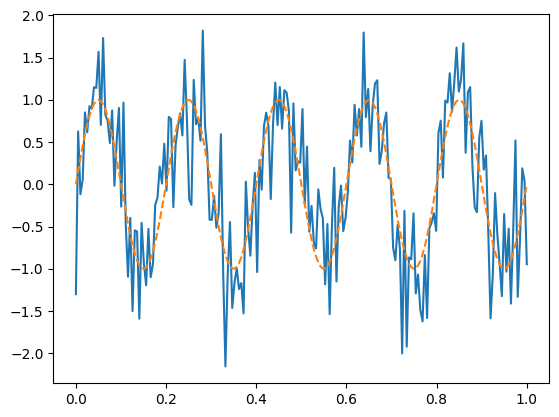

In [169]:
plt.plot(time, signal_with_noise)
plt.plot(time, np.sin(2 * np.pi * 5 * time), linestyle='dashed')

Использование фильтров из библиотеки SciPy

In [170]:
cutoff = 6  # Частота среза (Гц)

БИХ-фильтр (ФНЧ)

In [171]:
b_butter, a_butter = sp.signal.butter(4, Wn=cutoff, btype='low', fs=fs) # Фильтр Баттерворта
b_cheby, a_cheby = sp.signal.cheby1(4, rp=1, Wn=cutoff, btype='low', fs=fs) # Фильтр Чебышева I типа
b_ellip, a_ellip = sp.signal.ellip(9, Wn=cutoff, rp=1, rs=100, fs=fs) # Эллиптический фильтр (Кауэра)
b_bessel, a_bessel = sp.signal.bessel(4, Wn=cutoff, btype='low', fs=fs) # Фильтр Бесселя

Сравнение БИХ-фильтров

In [172]:
w, h_butter = sp.signal.freqz(b_butter, a_butter, fs=fs)
w, h_cheby = sp.signal.freqz(b_cheby, a_cheby, fs=fs)
w, h_bessel = sp.signal.freqz(b_bessel, a_bessel, fs=fs)
w, h_ellip = sp.signal.freqz(b_ellip, a_ellip, fs=fs)

Построение графиков АЧХ

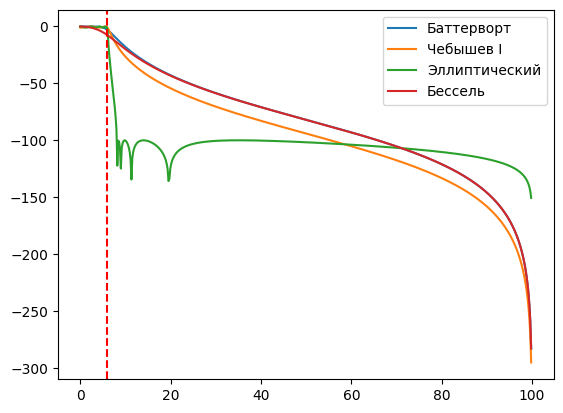

In [173]:
plt.plot(w, 20*np.log10(np.abs(h_butter)), label='Баттерворт')
plt.plot(w, 20*np.log10(np.abs(h_cheby)), label='Чебышев I')
plt.plot(w, 20*np.log10(np.abs(h_ellip)), label='Эллиптический')
plt.plot(w, 20*np.log10(np.abs(h_bessel)), label='Бессель')
plt.axvline(cutoff, color='r', linestyle='--')
plt.legend()

Фильтрация сигнала с используемыми фильтрами

In [174]:
filtered_iir_butter = sp.signal.lfilter(b_butter, a_butter, signal_with_noise)
filtered_iir_cheby = sp.signal.lfilter(b_cheby, a_cheby, signal_with_noise)
filtered_iir_bessel = sp.signal.lfilter(b_bessel, a_bessel, signal_with_noise)
filtered_iir_ellip = sp.signal.lfilter(b_ellip, a_ellip, signal_with_noise)

In [175]:
filtfilt_iir_butter = sp.signal.filtfilt(b_butter, a_butter, signal_with_noise)
filtfilt_iir_cheby = sp.signal.filtfilt(b_cheby, a_cheby, signal_with_noise)
filtfilt_iir_bessel = sp.signal.filtfilt(b_bessel, a_bessel, signal_with_noise)
filtfilt_iir_ellip = sp.signal.filtfilt(b_ellip, a_ellip, signal_with_noise)

Фильтрация сигнала с использованием каскадной структуры второго порядка (SOS)

In [176]:
butter_sos  = sp.signal.butter(4, cutoff, btype='low', fs=fs, output='sos') # Фильтр Баттерворта
cheby_sos = sp.signal.cheby1(4, rp=1, Wn=cutoff, btype='low', fs=fs, output='sos') # Фильтр Чебышева I типа
ellip_sos = sp.signal.ellip(9, Wn=0.06, rp=1, rs=100, fs=fs, output='sos') # Эллиптический фильтр (Кауэра)
bessel_sos = sp.signal.bessel(4, cutoff, btype='low', fs=fs, output='sos') # Фильтр Бесселя

In [177]:
butter_sosfilt = sp.signal.sosfilt(butter_sos, signal_with_noise) # Фильтрация в SOS-формате
cheby_sosfilt = sp.signal.sosfilt(cheby_sos, signal_with_noise) # Фильтрация в SOS-формате
ellip_sosfilt = sp.signal.sosfilt(ellip_sos, signal_with_noise) # Фильтрация в SOS-формате
bessel_sosfilt = sp.signal.sosfilt(bessel_sos, signal_with_noise) # Фильтрация в SOS-формате

Графики полученные для БИХ-фильтров

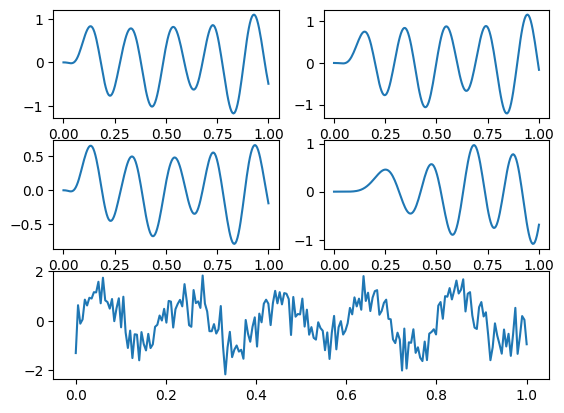

In [178]:
plt.subplot(321)
plt.plot(time, filtered_iir_butter)
plt.subplot(322)
plt.plot(time, filtered_iir_cheby)
plt.subplot(323)
plt.plot(time, filtered_iir_bessel)
plt.subplot(324)
plt.plot(time, filtered_iir_ellip)
plt.subplot(313)
plt.plot(time, signal_with_noise)

Графики с двойной фильтрацией (прямая и обратная)

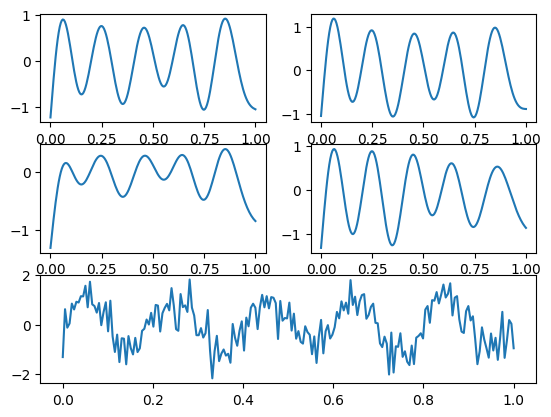

In [179]:
plt.subplot(321)
plt.plot(time, filtfilt_iir_butter)
plt.subplot(322)
plt.plot(time, filtfilt_iir_cheby)
plt.subplot(323)
plt.plot(time, filtfilt_iir_bessel)
plt.subplot(324)
plt.plot(time, filtfilt_iir_ellip)
plt.subplot(313)
plt.plot(time, signal_with_noise)

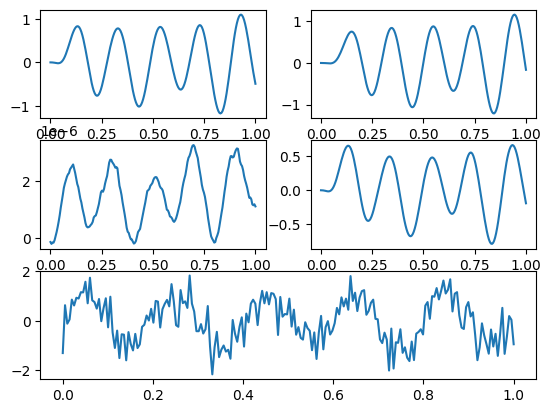

In [180]:
plt.subplot(321)
plt.plot(time, butter_sosfilt)
plt.subplot(322)
plt.plot(time, cheby_sosfilt)
plt.subplot(323)
plt.plot(time, ellip_sosfilt)
plt.subplot(324)
plt.plot(time, bessel_sosfilt)
plt.subplot(313)
plt.plot(time, signal_with_noise)

Графики групповой задержки фильтра

In [181]:
w, gd_butter = sp.signal.group_delay((b_butter, a_butter))
w, gd_cheby = sp.signal.group_delay((b_cheby, a_cheby))
w, gd_ellip = sp.signal.group_delay((b_ellip, a_ellip))
w, gd_bessel = sp.signal.group_delay((b_bessel, a_bessel))

/var/folders/lt/wpwcln813mng7m2nxcfncxmh0000gn/T/ipykernel_94122/167074395.py:3: UserWarning: The filter's denominator is extremely small at frequencies [0.000, 0.006, 0.012, 0.018, 0.025, 0.031, 0.037, 0.043, 0.049, 0.055, 0.061, 0.067, 0.074, 0.080, 0.086, 0.092, 0.098, 0.104, 0.110, 0.117, 0.123, 0.129, 0.135, 0.141, 0.147, 0.153, 0.160, 0.166, 0.172, 0.178, 0.184, 0.190, 0.196, 0.202, 0.209, 0.215, 0.221, 0.227, 0.233, 0.239, 0.245, 0.252, 0.258, 0.264, 0.270, 0.276, 0.282, 0.288, 0.295, 0.301, 0.307, 0.313, 0.319, 0.325, 0.331, 0.337, 0.344, 0.350, 0.356], around which a singularity may be present
  w, gd_ellip = sp.signal.group_delay((b_ellip, a_ellip))


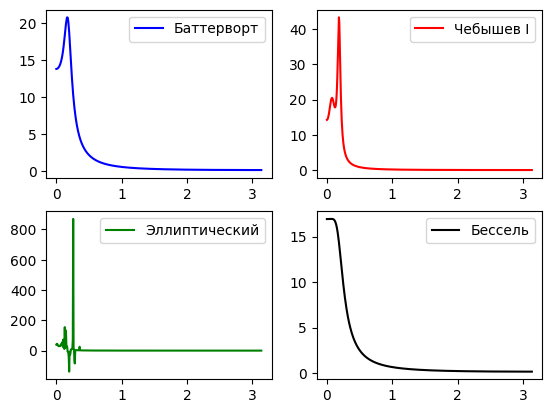

In [182]:
plt.subplot(221)
plt.plot(w, gd_butter, label="Баттерворт", color='blue')
plt.legend()
plt.subplot(222)
plt.plot(w, gd_cheby, label='Чебышев I', color='red')
plt.legend()
plt.subplot(223)
plt.plot(w, gd_ellip, label='Эллиптический', color='green')
plt.legend()
plt.subplot(224)
plt.plot(w, gd_bessel, label='Бессель', color='black')
plt.legend()

КИХ-фильтр

In [183]:
numtaps = 51  # Порядок фильтра

In [184]:
firwin_hamming = sp.signal.firwin(numtaps, cutoff, fs=fs, window='hamming') # Окно Хемминга
firwin_boxcar = sp.signal.firwin(numtaps, cutoff, fs=fs, window='boxcar') # Прямоугольное окно
firwin_blackman = sp.signal.firwin(numtaps, cutoff, fs=fs, window='blackman') # Окно Блекмена
firwin_triang = sp.signal.firwin(numtaps, cutoff, fs=fs, window='triang') # Треугольное окно
firwin_hann = sp.signal.firwin(numtaps, cutoff, fs=fs, window='hann') # Окно Ханна
firwin_parzen = sp.signal.firwin(numtaps, cutoff, fs=fs, window='parzen') # Окно Парзена
firwin2 = sp.signal.firwin2(numtaps, [0, 4, 4.5, 5, 5.5, fs/2], [0, 0, 1, 1, 0, 0], fs=fs) # Ручная настройка (по точечно)
remez = sp.signal.remez(numtaps, [0, 4.25, 4.5, 5.5, 5.75, fs/2], [0, 1, 0], fs=fs) # метод Ремеза (между точками с учетом перехода)
firls = sp.signal.firls(numtaps, [0, 4, 4.5, 5, 5.5, fs/2], [0, 0, 1, 1, 0, 0], fs=fs) # метод минимизации MSE (по точечно)

Фильтрация сигнала с используемыми фильтрами

In [185]:
filtered_fir_hamming = sp.signal.lfilter(firwin_hamming, 1.0, signal_with_noise)
filtered_fir_boxcar = sp.signal.lfilter(firwin_boxcar, 1.0, signal_with_noise)
filtered_fir_blackman = sp.signal.lfilter(firwin_blackman, 1.0, signal_with_noise)
filtered_fir_triang = sp.signal.lfilter(firwin_triang, 1.0, signal_with_noise)
filtered_fir_hann = sp.signal.lfilter(firwin_hann, 1.0, signal_with_noise)
filtered_fir_parzen = sp.signal.lfilter(firwin_parzen, 1.0, signal_with_noise)
filtered_fir_firwin2 = sp.signal.lfilter(firwin2, 1.0, signal_with_noise)
filtered_fir_remez = sp.signal.lfilter(remez, 1.0, signal_with_noise)
filtered_fir_firls = sp.signal.lfilter(firls, 1.0, signal_with_noise)

In [186]:
filtfilt_fir_hamming = sp.signal.filtfilt(firwin_hamming, 1.0, signal_with_noise)
filtfilt_fir_boxcar = sp.signal.filtfilt(firwin_boxcar, 1.0, signal_with_noise)
filtfilt_fir_blackman = sp.signal.filtfilt(firwin_blackman, 1.0, signal_with_noise)
filtfilt_fir_triang = sp.signal.filtfilt(firwin_triang, 1.0, signal_with_noise)
filtfilt_fir_hann = sp.signal.filtfilt(firwin_hann, 1.0, signal_with_noise)
filtfilt_fir_parzen = sp.signal.filtfilt(firwin_parzen, 1.0, signal_with_noise)
filtfilt_fir_firwin2 = sp.signal.filtfilt(firwin2, 1.0, signal_with_noise)
filtfilt_fir_remez = sp.signal.filtfilt(remez, 1.0, signal_with_noise)
filtfilt_fir_firls = sp.signal.filtfilt(firls, 1.0, signal_with_noise)

Фильтрация с использованием каскада фильтров второго порядка (SOS)

In [187]:
firwin_hamming_sos = sp.signal.tf2sos(firwin_hamming, 1)
firwin_boxcar_sos = sp.signal.tf2sos(firwin_boxcar, 1)
firwin_blackman_sos = sp.signal.tf2sos(firwin_blackman, 1)
firwin_triang_sos = sp.signal.tf2sos(firwin_triang, 1)
firwin_hann_sos = sp.signal.tf2sos(firwin_hann, 1)
firwin_parzen_sos = sp.signal.tf2sos(firwin_parzen, 1)
firwin_firwin2_sos = sp.signal.tf2sos(firwin2, 1)
firwin_remez_sos = sp.signal.tf2sos(remez, 1)
firwin_firls_sos = sp.signal.tf2sos(firls, 1)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/signal/_filter_design.py:1125: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  b, a = normalize(b, a)


In [188]:
hamming_sosfilt = sp.signal.sosfilt(firwin_hamming_sos, signal_with_noise)
boxcar_sosfilt = sp.signal.sosfilt(firwin_boxcar_sos, signal_with_noise)
blackman_sosfilt = sp.signal.sosfilt(firwin_blackman_sos, signal_with_noise)
triang_sosfilt = sp.signal.sosfilt(firwin_triang_sos, signal_with_noise)
hann_sosfilt = sp.signal.sosfilt(firwin_hann_sos, signal_with_noise)
parzen_sosfilt = sp.signal.sosfilt(firwin_parzen_sos, signal_with_noise)
firwin2_sosfilt = sp.signal.sosfilt(firwin_firwin2_sos, signal_with_noise)
remez_sosfilt = sp.signal.sosfilt(firwin_remez_sos, signal_with_noise)
firls_sosfilt = sp.signal.sosfilt(firwin_firls_sos, signal_with_noise)

Построение графиков АЧХ

In [189]:
w, h_hamming = sp.signal.freqz(firwin_hamming, 1, fs=fs)
w, h_boxcat = sp.signal.freqz(firwin_boxcar, 1, fs=fs)
w, h_blackman = sp.signal.freqz(firwin_blackman, 1, fs=fs)
w, h_triang = sp.signal.freqz(firwin_triang, 1, fs=fs)
w, h_hann = sp.signal.freqz(firwin_hann, 1, fs=fs)
w, h_parzen = sp.signal.freqz(firwin_parzen, 1, fs=fs)
w, h_firwin2 = sp.signal.freqz(firwin2, 1, fs=fs)
w, h_remez = sp.signal.freqz(remez, 1, fs=fs)
w, h_firls = sp.signal.freqz(firls, 1, fs=fs)

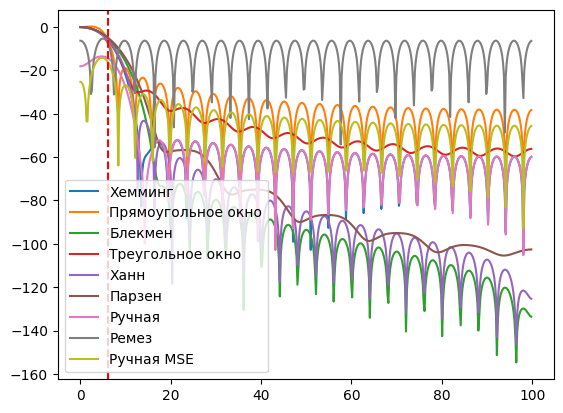

In [190]:
plt.plot(w, 20*np.log10(np.abs(h_hamming)), label='Хемминг')
plt.plot(w, 20*np.log10(np.abs(h_boxcat)), label='Прямоугольное окно')
plt.plot(w, 20*np.log10(np.abs(h_blackman)), label='Блекмен')
plt.plot(w, 20*np.log10(np.abs(h_triang)), label='Треугольное окно')
plt.plot(w, 20*np.log10(np.abs(h_hann)), label='Ханн')
plt.plot(w, 20*np.log10(np.abs(h_parzen)), label='Парзен')
plt.plot(w, 20*np.log10(np.abs(h_firwin2)), label='Ручная')
plt.plot(w, 20*np.log10(np.abs(h_remez)), label='Ремез')
plt.plot(w, 20*np.log10(np.abs(h_firls)), label='Ручная MSE')
plt.axvline(cutoff, color='r', linestyle='--')
plt.legend()

Графики полученные для КИХ-фильтров

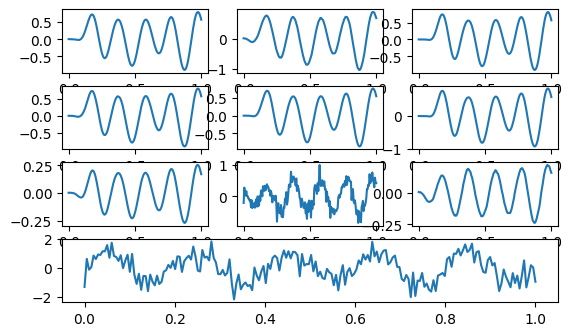

In [191]:
plt.subplot(531)
plt.plot(time, filtered_fir_hamming)
plt.subplot(532)
plt.plot(time, filtered_fir_boxcar)
plt.subplot(533)
plt.plot(time, filtered_fir_blackman)
plt.subplot(534)
plt.plot(time, filtered_fir_triang)
plt.subplot(535)
plt.plot(time, filtered_fir_hann)
plt.subplot(536)
plt.plot(time, filtered_fir_parzen)
plt.subplot(537)
plt.plot(time, filtered_fir_firwin2)
plt.subplot(538)
plt.plot(time, filtered_fir_remez)
plt.subplot(539)
plt.plot(time, filtered_fir_firls)
plt.subplot(514)
plt.plot(time, signal_with_noise)

Графики с двойной фильтрацией (прямая и обратная)

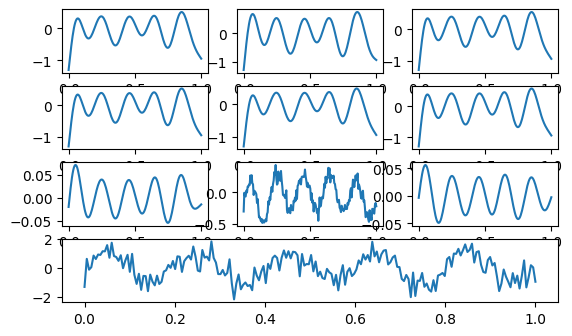

In [192]:
plt.subplot(531)
plt.plot(time, filtfilt_fir_hamming)
plt.subplot(532)
plt.plot(time, filtfilt_fir_boxcar)
plt.subplot(533)
plt.plot(time, filtfilt_fir_blackman)
plt.subplot(534)
plt.plot(time, filtfilt_fir_triang)
plt.subplot(535)
plt.plot(time, filtfilt_fir_hann)
plt.subplot(536)
plt.plot(time, filtfilt_fir_parzen)
plt.subplot(537)
plt.plot(time, filtfilt_fir_firwin2)
plt.subplot(538)
plt.plot(time, filtfilt_fir_remez)
plt.subplot(539)
plt.plot(time, filtfilt_fir_firls)
plt.subplot(514)
plt.plot(time, signal_with_noise)

Графики сигналово филтрованных каскадами фильтров второго порядка (SOS)

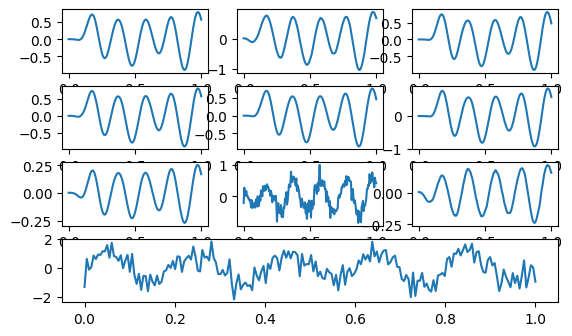

In [193]:
plt.subplot(531)
plt.plot(time, hamming_sosfilt)
plt.subplot(532)
plt.plot(time, boxcar_sosfilt)
plt.subplot(533)
plt.plot(time, blackman_sosfilt)
plt.subplot(534)
plt.plot(time, triang_sosfilt)
plt.subplot(535)
plt.plot(time, hann_sosfilt)
plt.subplot(536)
plt.plot(time, parzen_sosfilt)
plt.subplot(537)
plt.plot(time, firwin2_sosfilt)
plt.subplot(538)
plt.plot(time, remez_sosfilt)
plt.subplot(539)
plt.plot(time, firls_sosfilt)
plt.subplot(514)
plt.plot(time, signal_with_noise)

Спектрограмма сигналов

In [194]:
f, t, Sxx_signal = sp.signal.spectrogram(signal, fs=fs, nperseg=100, noverlap=50)
f, t, Sxx_signal_with_noise = sp.signal.spectrogram(signal_with_noise, fs=fs, nperseg=100, noverlap=50)

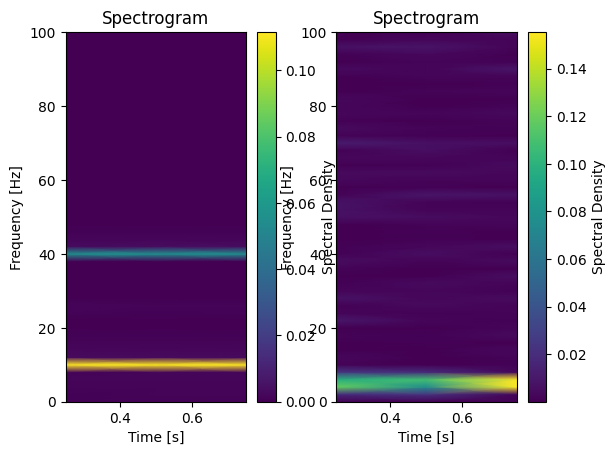

In [195]:
plt.subplot(1,2,1)
plt.pcolormesh(t, f, Sxx_signal, shading='gouraud')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.title('Spectrogram')
plt.colorbar(label='Spectral Density')

plt.subplot(1,2,2)
plt.pcolormesh(t, f, Sxx_signal_with_noise, shading='gouraud')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.title('Spectrogram')
plt.colorbar(label='Spectral Density')

Скользящее среднее (реализовано вручную)

In [196]:
def window_mean(signal, time, window_size):
    w_mean = []
    w_time = []
    for i in range(0, len(signal) - window_size + 1):
        w_mean.append(sum(signal[i: i + window_size + 1]) / window_size)
        w_time.append(sum(time[i: i + window_size + 1]) / window_size)
    return w_time, w_mean

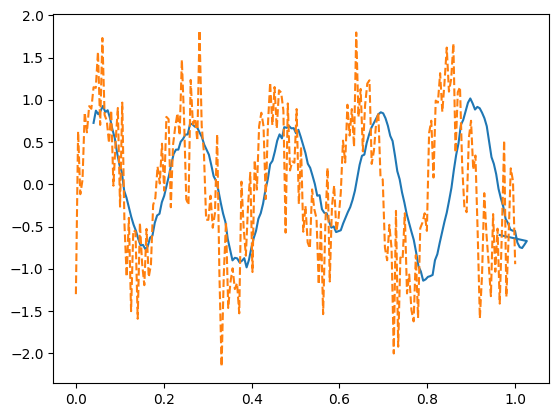

In [197]:
w_time, averaged_signal = window_mean(signal_with_noise, time, 15)
plt.plot(w_time, averaged_signal)
plt.plot(time, signal_with_noise, linestyle='--')

#Теория автоматического управления (ТАУ)

Передаточная функция\
Рассмотрим передаточную характеристику двигателя, описывающегося уравнением:\
$J\frac{d^2\theta}{dt^2} + b\frac{d\theta}{dt} = K_iu$ , где $J$ - момент инерции, $b$ - коэффициент трения, $K_i$ - коэффициент усиления\
Тогда переходная функция описывается в следующем виде:\
$W(s) = \frac{Y(s)}{U(s)} = \frac{b_ms^m + \cdots + b_1s + b_0}{a_ns^n + \cdots + a_1s + a_0}=\frac{K_i}{Js^n + bs}$

In [198]:
J = 0.01 # Момент инерции [Kg * m^2]
b = 0.1 # Коффициент вязкого трения [N * m * s]
K = 0.5 # Коэффициент усиления двигателя N * m / A

# Передаточная харатеристика
W_motor = sp.signal.TransferFunction([K], [J, b, 0]) # K / (0 * s + b*s^1 + J*s^2)

Полюса системы и стабильность

In [199]:
poles = W_motor.poles
print(poles)
print(all(np.real(poles) < 0))

[-10.   0.]
False


Переходная характеристика и АЧХ, ФЧХ системы

In [200]:
time, motor_trans = sp.signal.step(W_motor)
motor_trans_freq, mag, phase = sp.signal.bode(W_motor)

Графики переходной характеристики и АЧХ, ФЧХ системы

Text(0, 0.5, 'Фаза [рад]')

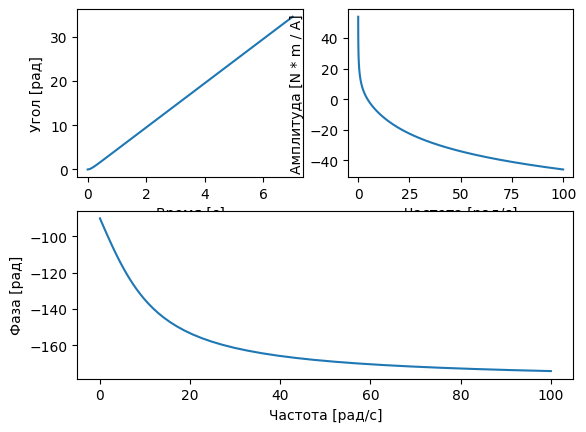

In [201]:
plt.subplot(221)
plt.plot(time, motor_trans)
plt.xlabel("Время [с]")
plt.ylabel("Угол [рад]")

plt.subplot(222)
plt.plot(motor_trans_freq, mag) # Амплитудно-частотная характеристика
plt.xlabel("Частота [рад/с]")
plt.ylabel("Амплитуда [N * m / A]")

plt.subplot(212)
plt.plot(motor_trans_freq, phase) # Фазо-частотная характеристика
plt.xlabel("Частота [рад/с]")
plt.ylabel("Фаза [рад]")

Полученные результаты переходной характеирстики эквивалентны обычному решению уравнения:
$J\frac{d^2\theta}{dt^2} + b\frac{d\theta}{dt} = K_iu$

In [202]:
def motor_diff_eq(t, init_cond):
    theta, phi = init_cond
    u = 1.0 if t > 0 else 0.0
    omega = (K * u - b * phi) / J 
    return [phi, omega]

Сравнение графика численного решения дифференциального уравнения и через переходную характеристику

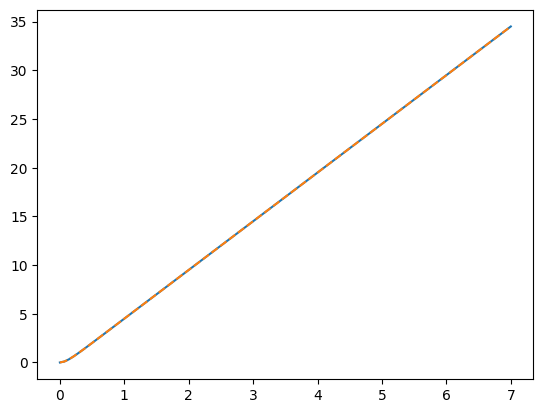

In [203]:
init_cond = [0, 0]
solution = sp.integrate.solve_ivp(motor_diff_eq, t_span=[0, max(time)], t_eval=time, y0=init_cond)
plt.plot(time, solution.y[0])
plt.plot(time, motor_trans, linestyle='dashed')

Определим устойчивость систем по критерию Михайлова

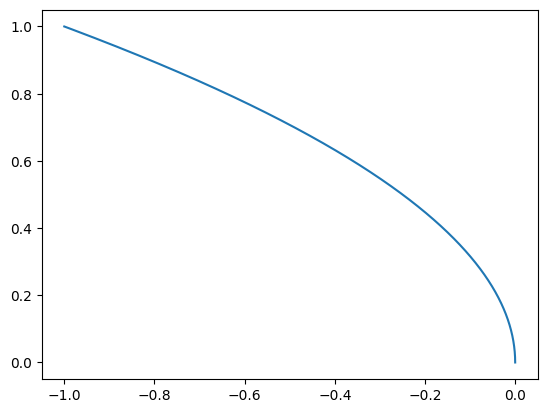

In [204]:
omega = np.linspace(0, 10, 1000)
coef = [J, b, 0]
s = 1j * omega
p = coef[0] * s ** 2 +  coef[1] * s + coef[2]
plt.plot(p.real, p.imag)

Определим стабильность системы по критерию Найквиста

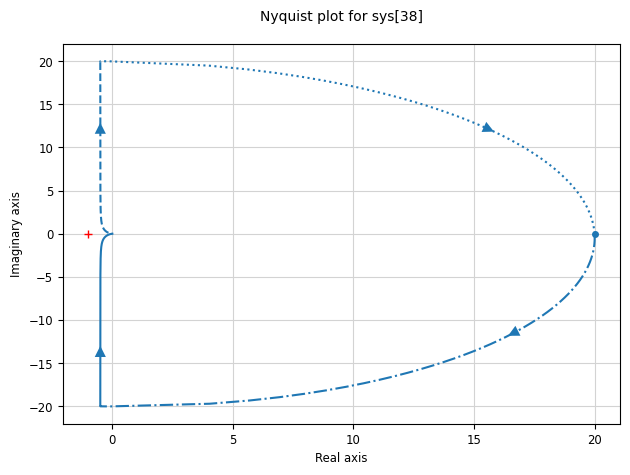

In [205]:
W_motor = control.TransferFunction([K], [J, b, 0])
control.nyquist_plot(W_motor)

ПИД-регулятор для рассматриваемой нами системы - мотора. 

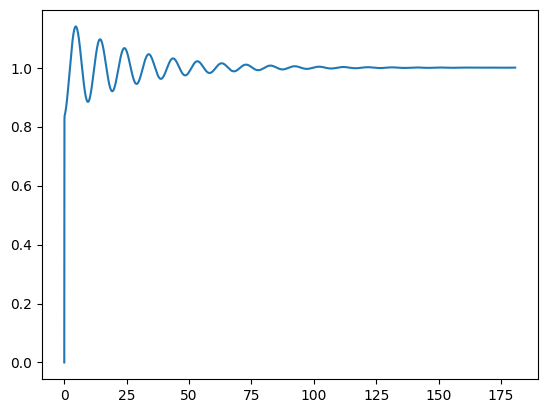

In [206]:
Kp = 1.0 # Коэффициент связанный пропроциональным поведением ошибок
Ki = 0.1 # Коэффициент связанный со статистическими ошибками (запоминающих прошлые ошибки)
Kd = 0.5 # Коэффициент связанный со скоростью изменения ошибки
pid = control.TransferFunction([Kp, Ki, Kd], [1, 0])
closed_loop = control.feedback(W_motor * pid, 1) # Описывает замкнутую систему y(t) = Kx(t)
time, transient = control.step_response(closed_loop)
plt.plot(time, transient)

Ручной ПИД-регулятор

In [207]:
prev_error = 0
init_error = 0
integral_err = 0
Kp, Ki, Kd = 1.0, 0.5, 0.1

def PID(error, t, dt):
    global prev_error, init_error, integral_err
    prop_err = Kp * error
    integral_err += Ki * error * dt
    differential_err = Kd * (error - prev_error) / dt
    prev_error = error
    return prop_err + integral_err + differential_err

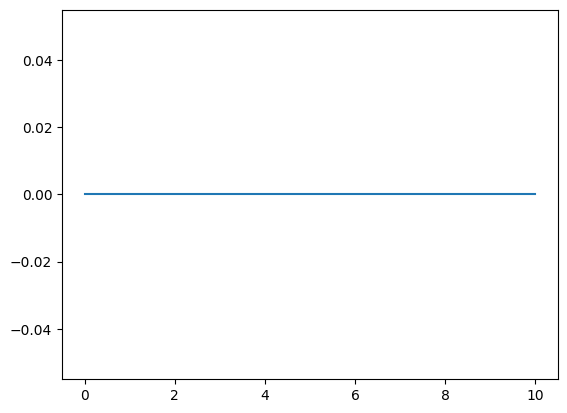

In [208]:
time = np.linspace(0, 10, 1000)
y = [PID(init_error, t, 10/ 1000) for t in time]
plt.plot(time, y)

Пространство состояний. Уравнение типа:\
$\begin{cases}
\dot{\mathbf{x}} = \mathbf{A}\mathbf{x} + \mathbf{B}u \\
y = \mathbf{C}\mathbf{x} + Du
\end{cases}$\
где x — вектор состояния, A — матрица системы, B — матрица управления, C — матрица выхода, D — сквозная матрица

Зададим матрицы системы

In [209]:
A = np.array([[0, 1], [-1, -2]])
B = np.array([[0], [1]])
C = np.array([[1, 0]])
D = np.array([[0]])

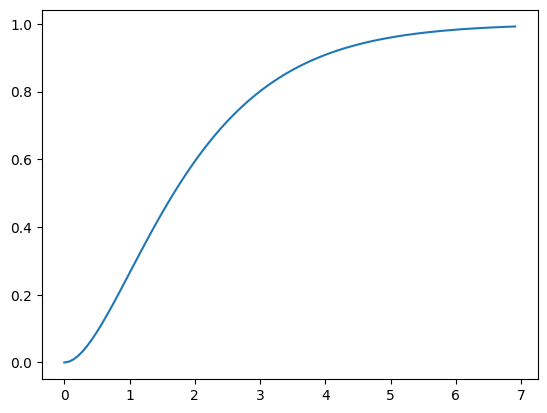

In [210]:
state_space_system = control.StateSpace(A, B, C, D)
time, state_space_trans = control.step_response(state_space_system)
plt.plot(time, state_space_trans)